# Titanic
## seaborn laod "titanic" : simple
## full data : Kaggle, Softeer(HMC)
## titanic data download

In [3]:
# train.csv (891행)
# PassengerId: 승객 식별 번호
# Survived: 0=사망, 1=생존
# Pclass: 1=1등석, 2=2등석, 3=3등석
# Name: 이름
# Sex: 성별
# Age: 나이
# SibSp: 동승 자매/배우자 수
# Parch: 동승 부모/자식 수
# Ticket: 티켓 번호
# Fare: 승객 요금
# Cabin: 방 호수
# Embarked: 탑승지/C=Cherbourg-en-Cotentin, Q=Queenstown, S=Southampton

# test.csv (418행)
# train.csv와 구성 동일
# Survived가 존재하지 않음

# submission.csv
# 제출을 위한 기본 양식
# Survived에 예측한 값을 기입하여 제출

# 평가 산식
# * 25/2/19 부로 RMSE -> Accuracy로 변경
# Accuracy: 실제값과 예측값이 일치하는 비율을 나타내며, 전체 데이터 중 정확하게 예측한 개수의 비율로 계산된 값

In [4]:
# 메타 문자
print("newline\ntab\ttab")

newline
tab	tab


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [6]:
datapath = Path("./data/titanic")
train_df = pd.read_csv(datapath / "train.csv")
test_df = pd.read_csv(datapath / "test.csv")

In [7]:
# target : Survived, 카테고리 데이터 -> 분류문제
# features (처음 분석/정리할 내용)
    # 데이터가 아직 아닌 것 : Name, SibSp, Parch, Ticket, Cabin => 데이터 추출
    # 카테고리 : Pclass, Sex, Embarked => 숫자로 바꿔줌 (encoding)
    # 연속된 숫자 : Age, Fare => 단위를 맞춰줌 (scaling)
train_df.info()
len(train_df["Cabin"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


148

# EDA (Exploratory Data Analysis)
## category data : sns.countplot (w. hue)
## continuous data : sns.histplot (w. hue)

<Axes: xlabel='Survived', ylabel='count'>

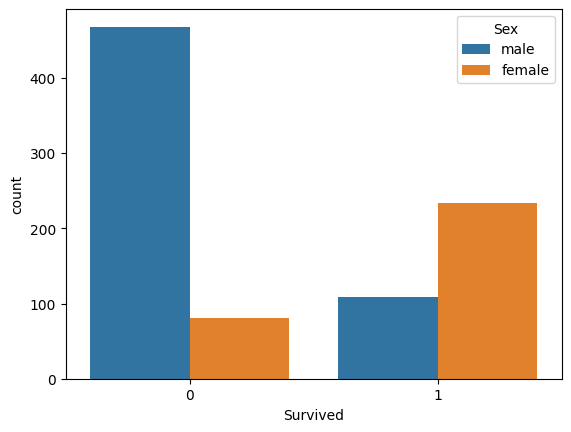

In [8]:
sns.countplot(data=train_df, x="Survived", hue="Sex")

In [9]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# 데이터 이상 유무 : 결측값 확인
## pandas, NaN : 숫자도 아니고, 문자도 아니고 아무것도 아님...
## 집계해서 봐야함

In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
round(test_df.isna().mean()*100, 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

## Embarked 결측값 처리

<Axes: xlabel='Embarked', ylabel='count'>

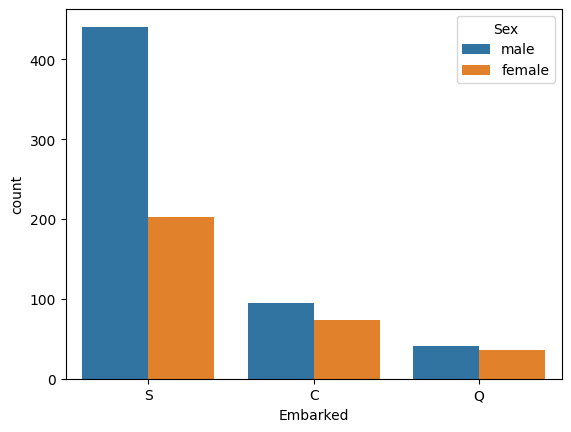

In [12]:
sns.countplot(data=train_df, x="Embarked", hue="Sex")

In [13]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Fare'>

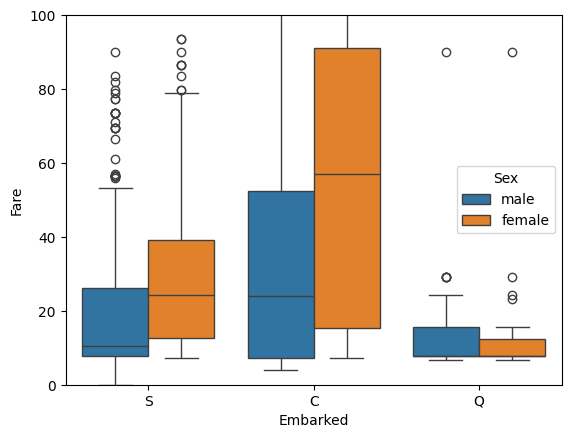

In [14]:
# 어느 지역에서 탑승했는지가 운임요금과 상관성이 있을 수 있다. (boxplot)
plt.ylim([0, 100])
sns.boxplot(data=train_df, x="Embarked", y="Fare", hue="Sex")

In [15]:
train_df[train_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
# 데이터를 살펴보니 여자, 운임요금=80인 경우는 Embarked = "C"
train_df.loc[train_df["Embarked"].isna(), "Embarked"]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [17]:
train_df.loc[train_df["Embarked"].isna(), "Embarked"] = "C"

In [18]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

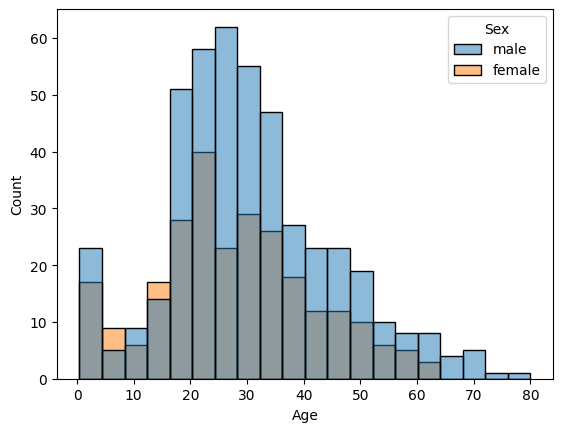

In [19]:
sns.histplot(data=train_df, x="Age", hue="Sex")

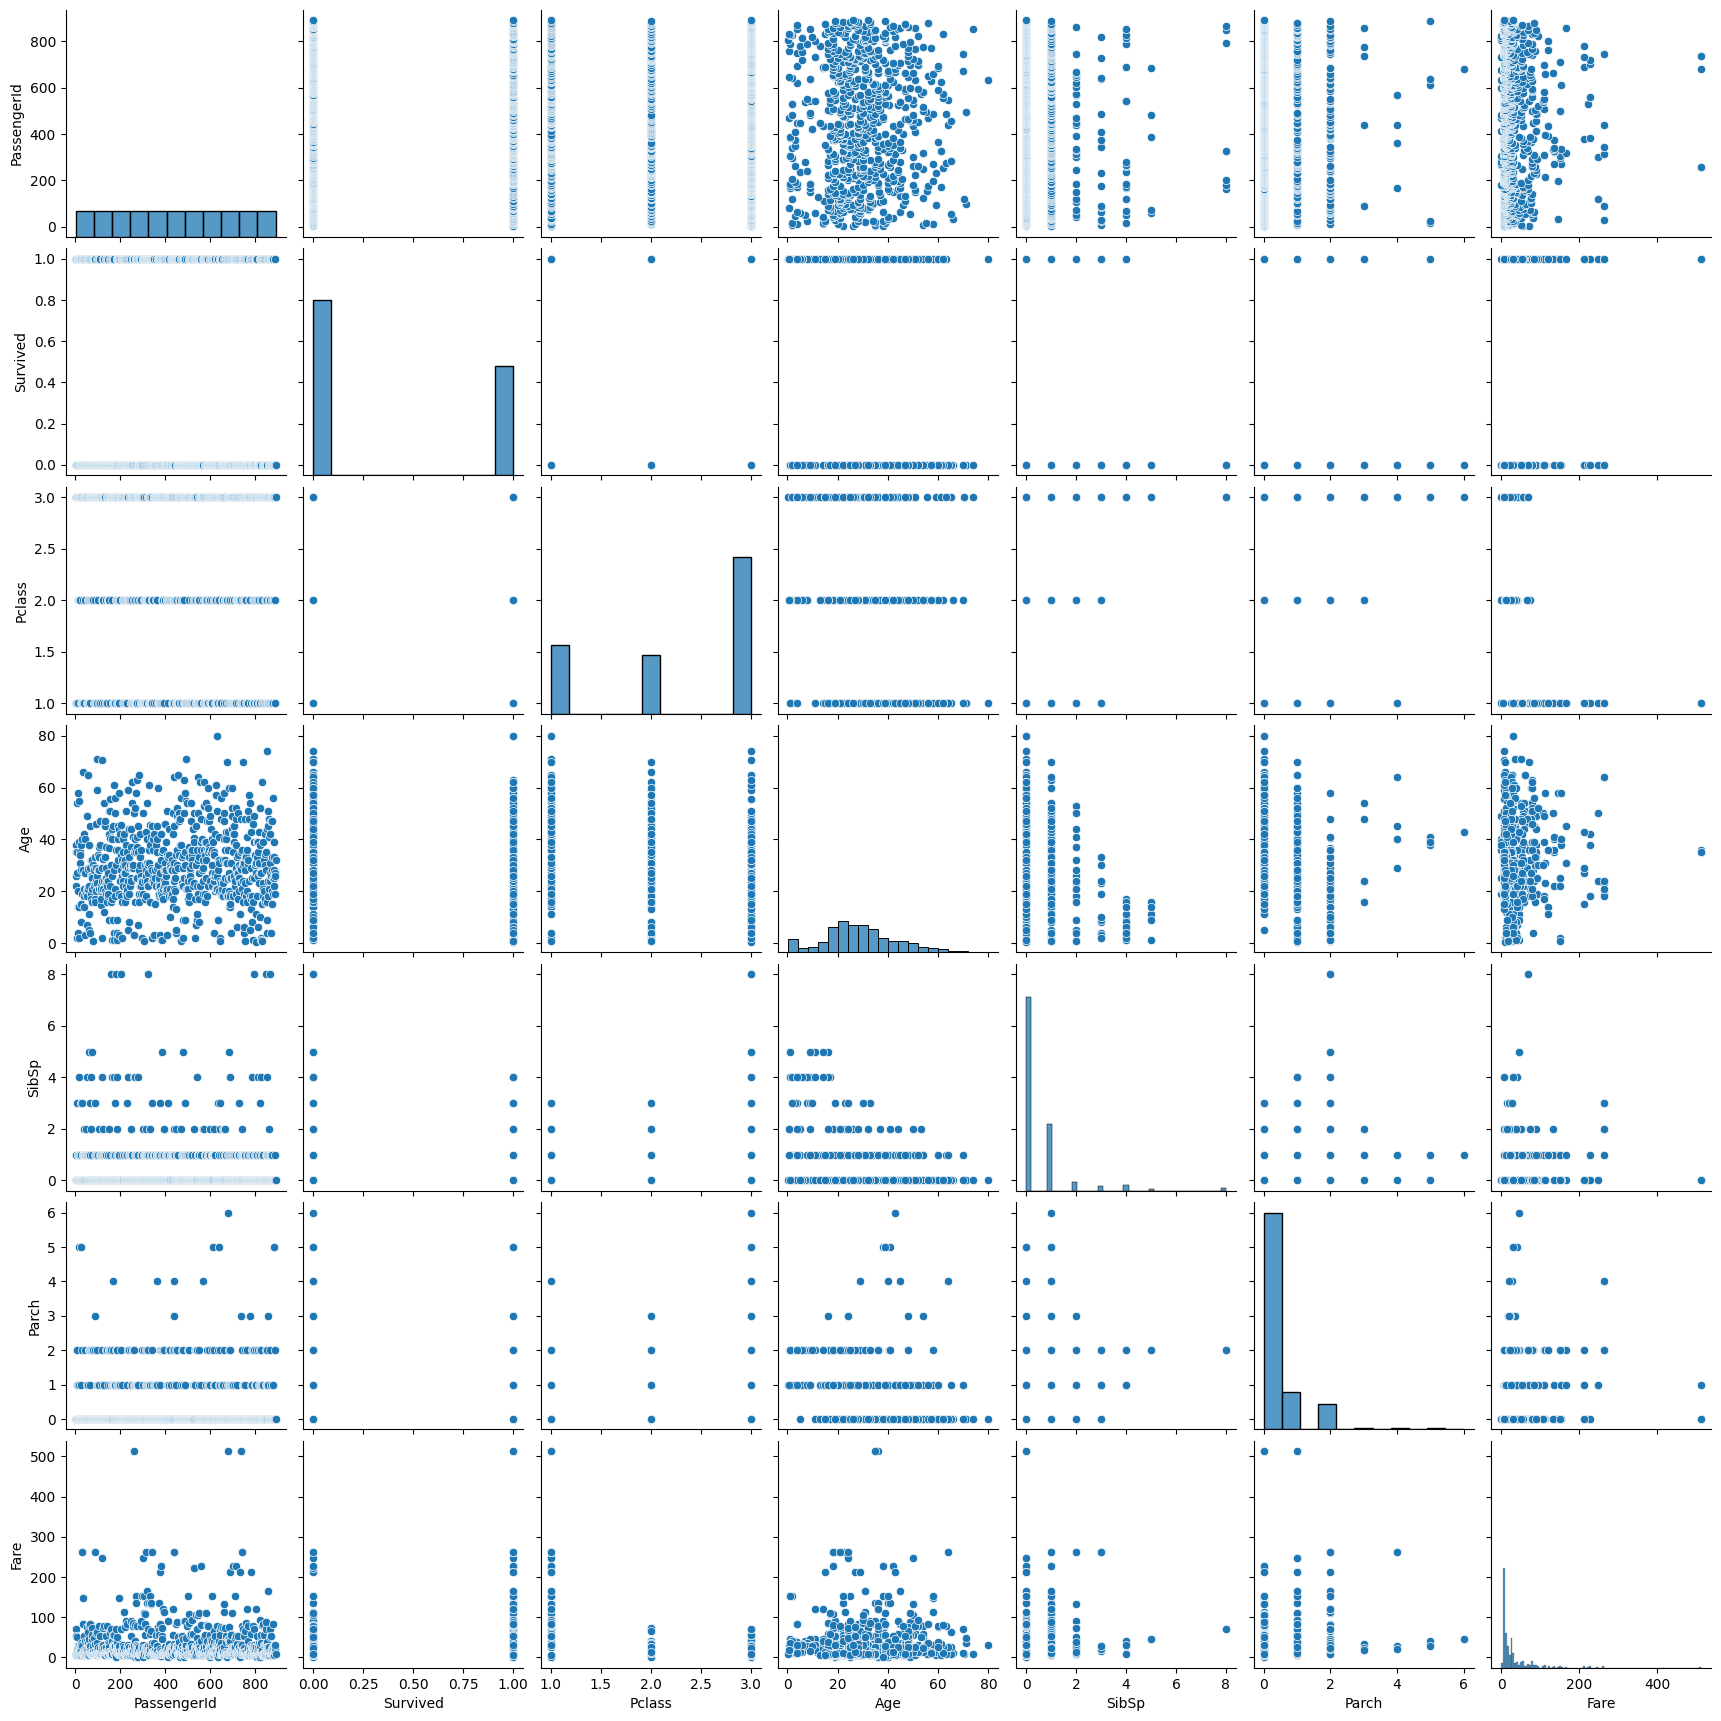

In [20]:
sns.pairplot(data=train_df)

In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='Age'>

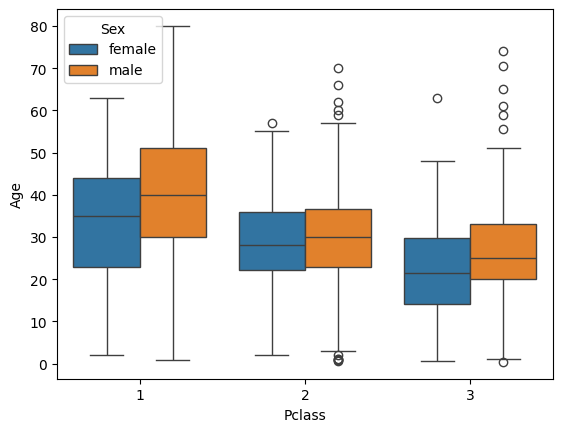

In [22]:
sns.boxplot(data=train_df, x="Pclass", y="Age", hue="Sex")

## 나이를 클래스와 성별을 가지고 평균값으로 결측값 대체

In [23]:
train_df.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [24]:
train_df.loc[train_df["Age"].isna(), "Age"]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [25]:
age_mean = train_df.pivot_table(index="Pclass", columns="Sex", values="Age", aggfunc="mean")

In [26]:
age_mean

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [27]:
age_mean.loc[1, "male"]

41.28138613861386

In [28]:
age_class = train_df.groupby(["Pclass", "Sex"])["Age"].mean()
age_class

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [29]:
age_class.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [30]:
for idx in age_class.index:
    cond1 = train_df["Pclass"] == idx[0]
    cond2 = train_df["Sex"] == idx[1]
    cond3 = train_df["Age"].isna()
    train_df.loc[cond1 & cond2 & cond3, "Age"] = age_mean.loc[idx[0], idx[1]]
    
    cond1 = test_df["Pclass"] == idx[0]
    cond2 = test_df["Sex"] == idx[1]
    cond3 = test_df["Age"].isna()
    test_df.loc[cond1 & cond2 & cond3, "Age"] = age_mean.loc[idx[0], idx[1]]

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Fare', ylabel='Count'>

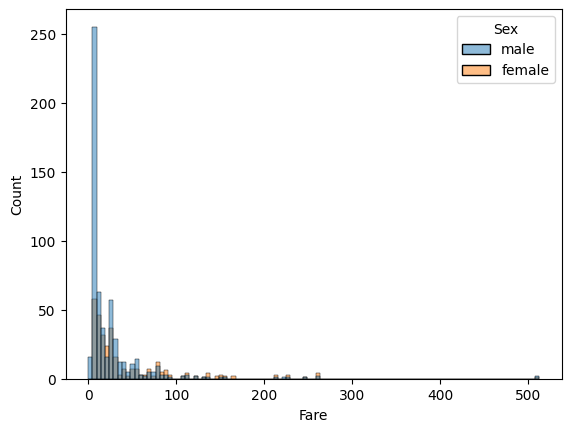

In [33]:
sns.histplot(data=train_df, x="Fare", hue="Sex")

<Axes: xlabel='Pclass', ylabel='Fare'>

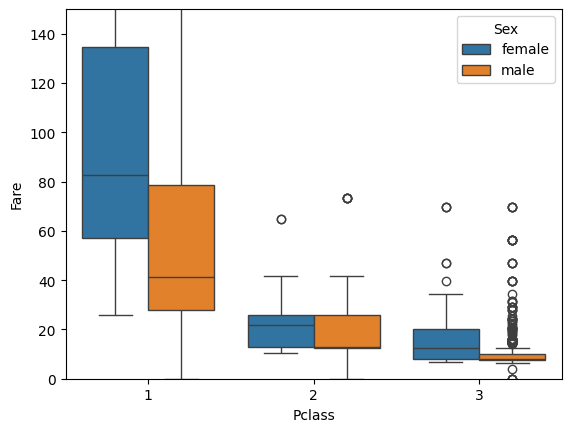

In [34]:
plt.ylim([0, 150])
sns.boxplot(data=train_df, x="Pclass", y="Fare", hue="Sex")

In [35]:
# Fare가 비어있는 데이터
test_df[test_df["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [36]:
train_df.groupby(["Pclass", "Sex"])["Fare"].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [37]:
test_df.loc[test_df["Fare"].isna(), "Fare"] = 7.925

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature Engineering
- 데이터가 아닌 것들 : Name, Ticket
- 카테고리 데이터 : Pclass, Sex, Embarked -> encoding
- 연속된 숫자 데이터 : Age, Fare, SibSp, Parch -> scaling

## 데이터가 아닌 것들에서 데이터를 추출

In [39]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [40]:
# Name
"Braund, Mr. Owen Harris".split(", ")[1].split(".")[0]

'Mr'

In [41]:
train_df["Name_tag"] = train_df["Name"].apply(lambda x: x.split(", ")[1].split(".")[0])
train_df["Name_tag"].value_counts()

Name_tag
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

### 카테고리가 20개 -> 나중에 onehot encoding하면 차원의 저주(curse of dimensionality) 문제가 발생

<Axes: xlabel='Name_tag', ylabel='count'>

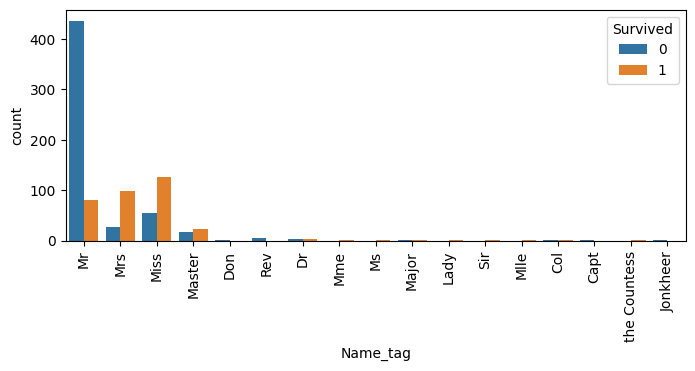

In [42]:
plt.figure(figsize=(8,3))
plt.xticks(rotation=90)
sns.countplot(data=train_df, x="Name_tag", hue="Survived")

In [43]:
# mr
# mrs : mrs, miss, mme, lady, mlle, col, ...
# master
# etc

In [44]:
len(train_df["Ticket"].unique())

681

### Name 과 Ticket 데이터는 사용하지 않음 : 예측의 유의미성이 없음

## 스케일링 (연속된 데이터)
- Age, Fare, SibSp, Parch
- 데이터의 크기를 맞춘다
- 숫자 데이터가 한쪽으로 심하게 skew되어 있으면 처리를 한다
- Standard Scaling : 일반적인 경우
    - 데이터를 평균으로 빼서 편차로 나누어 줌 (평균 0, 편차 1)
- MinMax Scailing : 데이터의 범위가 정해져야 하는 경우
    - 모든 데이터를 0과 1사이로 맵핑
    - 모든 데이터를 최소값으로 빼서 전체 길이로 나누어 줌

In [45]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Name_tag         0
dtype: int64

In [46]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [47]:
# Family (continuous number)
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]
test_df["Family"] = test_df["SibSp"] + test_df["Parch"]
train_df["Family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

<Axes: xlabel='Family', ylabel='Count'>

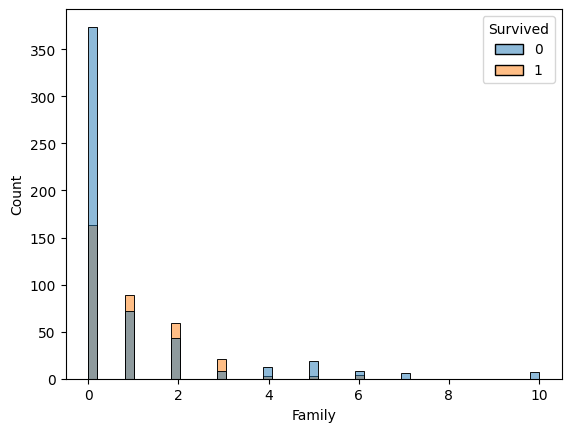

In [48]:
sns.histplot(data=train_df, x="Family", hue="Survived")

In [49]:
# log는 0이 있으면 무한대로 문제, 1을 더해서 해결 : log1p
train_df["Fare_log"] = np.log1p(train_df["Fare"])
test_df["Fare_log"] = np.log1p(test_df["Fare"])

In [50]:
train_df["Family_log"] = np.log1p(train_df["Family"])
test_df["Family_log"] = np.log1p(test_df["Family"])

<Axes: xlabel='Family_log', ylabel='Count'>

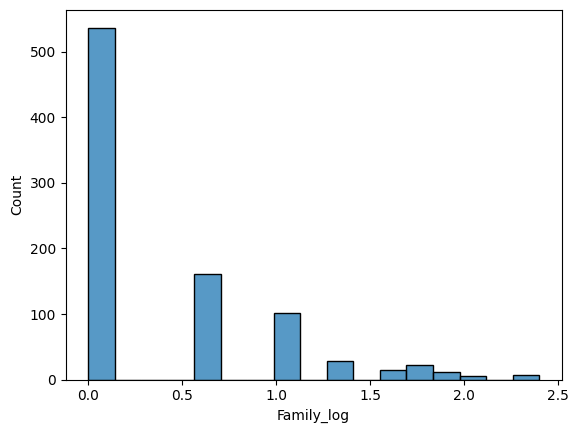

In [51]:
sns.histplot(data=train_df, x="Family_log")

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [54]:
num_features = ["sAge", "sFare", "sFamily"]

In [55]:
train_df[num_features] = sc.fit_transform(train_df[["Age", "Fare_log", "Family_log"]])

In [56]:
test_df[num_features] = sc.transform(test_df[["Age", "Fare_log", "Family_log"]])

<Axes: xlabel='sFare', ylabel='Count'>

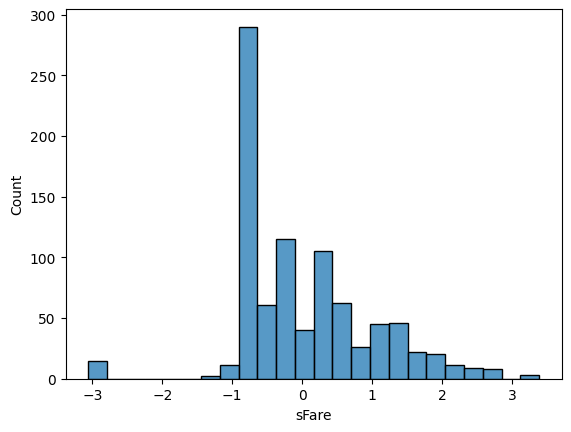

In [57]:
sns.histplot(data=train_df, x="sFare")

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Name_tag     891 non-null    object 
 13  Family       891 non-null    int64  
 14  Fare_log     891 non-null    float64
 15  Family_log   891 non-null    float64
 16  sAge         891 non-null    float64
 17  sFare        891 non-null    float64
 18  sFamily      891 non-null    float64
dtypes: float

## 인코딩

In [59]:
num_features

['sAge', 'sFare', 'sFamily']

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
cat_features = ["Pclass", "Sex", "Embarked"]

In [62]:
onehot = OneHotEncoder(drop="first", sparse_output=False)
onehot.fit(train_df[cat_features])
onehot.transform(train_df[cat_features])

array([[0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.]])

In [63]:
onehot.get_feature_names_out()

array(['Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [64]:
onehot_features = list(onehot.get_feature_names_out())
train_df[onehot_features] = onehot.transform(train_df[cat_features])
test_df[onehot_features] = onehot.transform(test_df[cat_features])

In [65]:
features = num_features + onehot_features
features

['sAge',
 'sFare',
 'sFamily',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [66]:
X = train_df[features]
y = train_df["Survived"]
test_x = test_df[features]

In [67]:
import pickle

dataset = {"x": X, "y": y, "test_x": test_df[features]}
with open(datapath / "dataset.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sAge        891 non-null    float64
 1   sFare       891 non-null    float64
 2   sFamily     891 non-null    float64
 3   Pclass_2    891 non-null    float64
 4   Pclass_3    891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [69]:
from sklearn.model_selection import train_test_split, cross_val_score

In [70]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
scores = list()
for i in range(1,51):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i), train_x, train_y, cv=5).mean()
    scores.append(score)

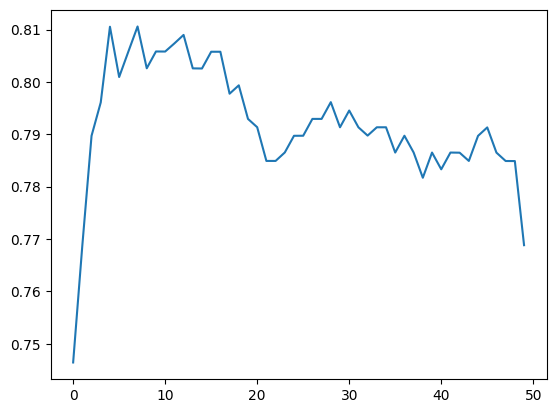

In [73]:
plt.plot(scores)

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
score = knn.score(valid_x, valid_y)
score

0.7798507462686567

In [75]:
submit = test_df[["PassengerId"]].copy()
submit["Survived"] = knn.predict(test_x)
submit.to_csv(datapath / "submissions.csv", index=False)

### knn, tree, svm, randomforest
* 예측을 잘함 (ensemble model) : randomforest, xgboot, lightboost
* 설명을 잘함 : knn, svm

## 결정트리 모델
- 타겟 데이터를 가장 순수해 지는 쪽으로(한쪽으로 쏠리도록) 데이터를 계속 2개로 쪼갬
- 완전히 분류가 될때까지 계속 작동하여 쉽게 오버피팅이 되는 모델
- 중간에 잘 끊어줘야 함!

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {"max_depth": [5, 10, 15, 25], "min_samples_leaf": [5, 10, 15]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 25],
                         'min_samples_leaf': [5, 10, 15]})

In [78]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

In [79]:
df = pd.DataFrame(grid.cv_results_["params"])
df["score"] = grid.cv_results_["mean_test_score"]
pd.pivot_table(data=df, index="max_depth", columns="min_samples_leaf", values="score")

min_samples_leaf,5,10,15
max_depth,,,
5,0.820206,0.815394,0.799303
10,0.794542,0.810606,0.791265
15,0.799355,0.810606,0.791265
25,0.799355,0.810606,0.791265


In [80]:
grid.score(valid_x, valid_y)

0.7835820895522388

In [81]:
submit = test_df[["PassengerId"]].copy()
submit["Survived"] = grid.predict(test_x)
submit.to_csv(datapath / "submissions.csv", index=False)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
param_grid = {"max_depth": [1, 5, 10, 15, 25], "min_samples_leaf": [1, 5, 10, 15]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15, 25],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [84]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 5}

In [85]:
df = pd.DataFrame(grid.cv_results_["params"])
df["score"] = grid.cv_results_["mean_test_score"]
pd.pivot_table(data=df, index="max_depth", columns="min_samples_leaf", values="score")

min_samples_leaf,1,5,10,15
max_depth,,,,
1,0.760813,0.767187,0.770452,0.760787
5,0.818555,0.818542,0.813768,0.808942
10,0.818568,0.818555,0.802490,0.808955
15,0.813781,0.820129,0.805716,0.804116
25,0.804103,0.818529,0.804129,0.812129


In [86]:
grid.score(valid_x, valid_y)

0.8171641791044776

In [87]:
submit = test_df[["PassengerId"]].copy()
submit["Survived"] = grid.predict(test_x)
submit.to_csv(datapath / "submissions1.csv", index=False)

# 타이타닉 생존자 분석
## 데이터를 읽어와서 살펴보기
- 각 컬럼별로 무엇이 카테고리이고 연속된 숫자
- 타겟 : 카테고리 -> 분류, 연속된 숫자 -> 회귀
- 시각화하면서 살펴보기 (countplot, histplot, boxplot, scatterplot, pairplot with hue option)
## 양품 데이터인가?
- 결측 데이터 처리
- 아웃라이어 제거
- 나올 수 없는 범위 값 제거
## Feature Engineering
- 데이터가 아닌 것에서 데이터를 추출
- 스케일링
- 인코딩
## 여러가지 ML 모델 사용

In [114]:
!pip show xgboost

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\users\5415111\.conda\envs\pytorch\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [115]:
with open(datapath / "dataset.pkl", mode="rb") as f:
    dataset = pickle.load(f)
dataset.keys()

dict_keys(['x', 'y', 'test_x'])

In [116]:
age_class = train_df.groupby(["Pclass", "Sex"])["Age"].mean()

In [117]:
train_df["Age"].isna().sum()

0

In [118]:
for idx in age_class.index:
    # df.loc["조건", "컬럼"] = 설정값
    print(idx[0], idx[1])

1 female
1 male
2 female
2 male
3 female
3 male


In [119]:
# [], (), {}
# [] : 자료구조에서 값을 찾아들어갈 때 (선택), 리스트 생성할 때
# () : 함수를 동작시킬때

In [120]:
train_df.groupby(["Pclass", "Sex"])["Age"].agg(["mean", "max"])

mean   max
Pclass Sex                    
1      female  34.611765  63.0
       male    41.281386  80.0
2      female  28.722973  57.0
       male    30.740707  70.0
3      female  21.750000  63.0
       male    26.507589  74.0

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {"max_depth": [1, 5, 10, 15, 25], "min_samples_leaf": [1, 5, 10, 15]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15, 25],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [123]:
grid.score(valid_x, valid_y)

0.8246268656716418

In [124]:
submit = test_df[["PassengerId"]].copy()
submit["Survived"] = grid.predict(test_x)
submit.to_csv(datapath / "submissions.csv", index=False)

In [135]:
df = pd.DataFrame({"data": [1e-6,1,5,10,100]})
df["log1p"] = np.log1p(df["data"])
df["log"] = np.log(df["data"])
df

,data,log1p,log
0,0.000001,9.999995e-07,-13.815511
1,1.000000,6.931472e-01,0.000000
2,5.000000,1.791759e+00,1.609438
3,10.000000,2.397895e+00,2.302585
4,100.000000,4.615121e+00,4.605170


In [140]:
round(train_df[num_features].describe(), 1)

,sAge,sFare,sFamily
count,891.0,891.0,891.0
mean,0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-2.2,-3.1,-0.7
25%,-0.6,-0.8,-0.7
50%,-0.2,-0.2,-0.7
75%,0.5,0.5,0.4
max,3.8,3.4,3.3


In [156]:
sc = StandardScaler()
sc.fit(train_df[num_features])
X = pd.DataFrame(sc.transform(train_df[num_features]), columns=num_features)
test_x = pd.DataFrame(sc.transform(test_df[num_features]), columns=num_features)
round(X.describe(), 2)

,sAge,sFare,sFamily
count,891.00,891.00,891.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.18,-3.06,-0.72
25%,-0.57,-0.80,-0.72
50%,-0.21,-0.23,-0.72
75%,0.50,0.52,0.45
max,3.82,3.39,3.31


In [151]:
cat_features

['Pclass', 'Sex', 'Embarked']

In [152]:
onehot = OneHotEncoder(drop="first", sparse_output=False)
onehot.fit(train_df[cat_features])

OneHotEncoder(drop='first', sparse_output=False)

In [153]:
onehot.transform(train_df[cat_features])

array([[0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.]])

In [157]:
X[onehot.get_feature_names_out()] = onehot.transform(train_df[cat_features])
test_x[onehot.get_feature_names_out()] = onehot.transform(test_df[cat_features])

In [158]:
X.columns

Index(['sAge', 'sFare', 'sFamily', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [163]:
y = train_df["Survived"]
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)[0]

,sAge,sFare,sFamily,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
748,-0.777378,1.062038,0.448265,0.0,0.0,1.0,0.0,1.0
45,-0.211777,-0.784179,-0.717091,0.0,1.0,1.0,0.0,1.0
28,-0.570201,-0.803852,-0.717091,0.0,1.0,0.0,1.0,0.0
633,0.901240,-3.058578,-0.717091,0.0,0.0,1.0,0.0,1.0
403,-0.099343,-0.142379,0.448265,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
476,0.352681,0.132985,0.448265,1.0,0.0,1.0,0.0,1.0
190,0.202006,-0.333698,-0.717091,1.0,0.0,0.0,0.0,1.0
736,1.407402,0.623394,1.988781,0.0,1.0,0.0,0.0,1.0
462,1.332065,0.737276,-0.717091,0.0,0.0,1.0,0.0,1.0


In [177]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [178]:
param_grid = {"max_depth": [1, 5, 10, 15, 25], "min_samples_leaf": [1, 5, 10, 15]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [179]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15, 25],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [180]:
grid.score(valid_x, valid_y)

0.8097014925373134

In [181]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [195]:
grid.cv_results_["mean_fit_time"]

array([0.00170774, 0.0009666 , 0.00111771, 0.00102229, 0.00118203,
       0.00117955, 0.0016036 , 0.00114188, 0.00140052, 0.0014214 ,
       0.00162482, 0.00113544, 0.00152011, 0.00139832, 0.00120001,
       0.00139198, 0.00146785, 0.00132632, 0.00139627, 0.0013217 ])

<Axes: >

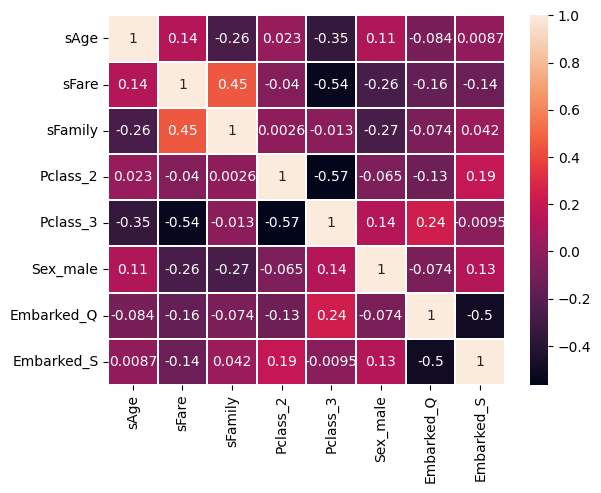

In [196]:
sns.heatmap(X.corr(), annot=True, linewidths=0.01)

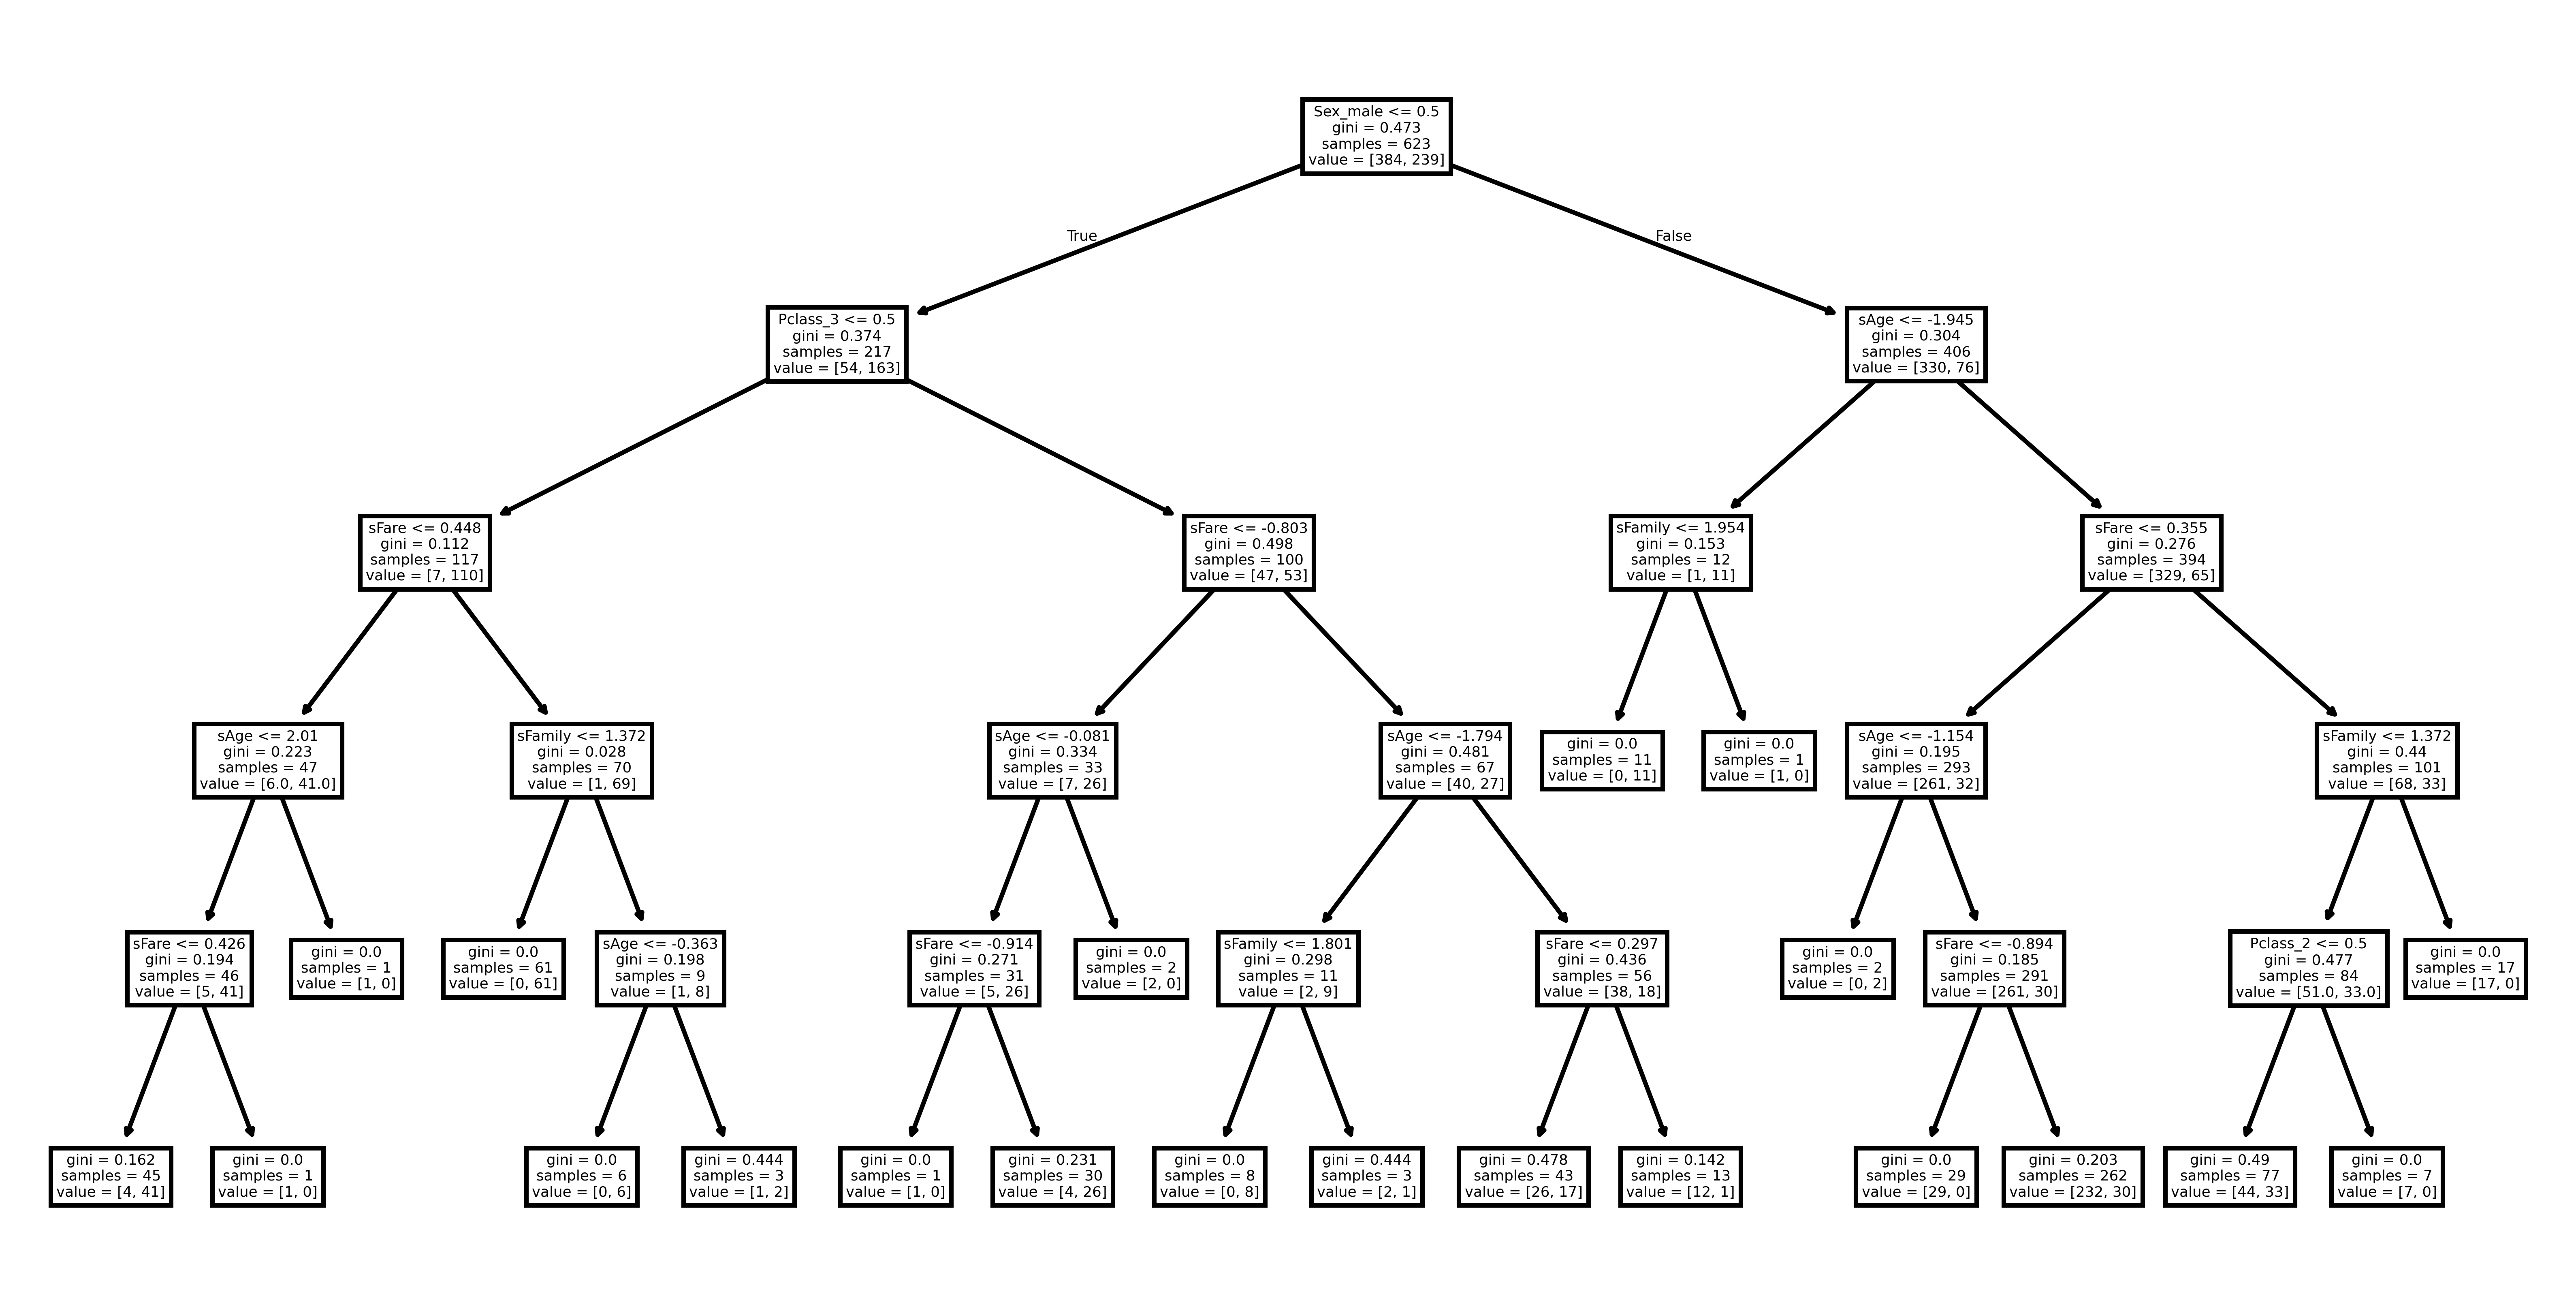

In [197]:
plt.figure(figsize=(10,5), dpi=800)
plot_tree(grid.best_estimator_, feature_names=grid.best_estimator_.feature_names_in_)
plt.show()

## Random Forest
- 약한 트리 여러개를 합침
- 다양성을 살린 모델
    - Feature 선택할 때 랜덤하게 전체 집합을 택해서 그 중에서 제일 좋은 Feature
    - 여러 개의 나무를 각각 훈련할 때 bootstrap 샘플링 기법을 이용해서 각기 다른 훈련용 셋을 만듬
- 사용하기도 쉽고 성능도 좋음

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
param_grid = {"max_depth": [3,5,10,15,20,25], "min_samples_leaf": [1,5,10,15,20]}
grid = GridSearchCV(RandomForestClassifier(random_state=23, bootstrap=True), param_grid=param_grid, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 5, 10, 15, 20]})

In [206]:
grid.score(valid_x, valid_y)

0.8283582089552238

In [207]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [208]:
grid.score(train_x, train_y)

0.8282504012841091

In [209]:
submit = test_df[["PassengerId"]].copy()
submit["Survived"] = grid.predict(test_x)
submit.to_csv(datapath / "submissions.csv", index=False)

In [210]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
